In [1]:
#%pip install torch 
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import pathlib
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from sklearn.model_selection import train_test_split


In [2]:
#%pip install torchvision

In [3]:
listings1= pd.read_csv('..\data\processed\listings_encoded.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\dimit\AppData\Local\Temp\ipykernel_28328\1068021782.py:1: SyntaxWarning: invalid escape sequence '\d'
  listings1= pd.read_csv('..\data\processed\listings_encoded.csv')


In [4]:
listings1

,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,dist_alexanderplatz,dist_potsdamer_platz,dist_kurfürstendamm,dist_brandenburg_gate,dist_hackescher_markt,dist_checkpoint_charlie,dist_kreuzberg,dist_friedrichshain,dist_mauerpark,dist_museum_island
0,0.40,False,1.0,1.0,52.534710,13.418100,2,1.0,1.0,2.0,...,1.451829,3.960506,7.053535,3.412981,1.697531,3.570160,4.391569,3.226328,1.312969,2.275344
1,0.00,False,1.0,1.0,52.532690,13.418050,7,2.5,4.0,4.0,...,1.233193,3.803451,6.940055,3.280164,1.529649,3.379541,4.185796,3.087509,1.467104,2.077945
2,0.38,True,4.0,5.0,52.548130,13.403660,1,1.0,0.0,1.0,...,2.977826,4.655742,7.186716,3.952129,2.796583,4.615271,5.565198,4.963949,0.636084,3.502705
3,0.00,False,4.0,4.0,52.503120,13.435080,4,1.0,1.0,1.0,...,2.566539,4.032239,7.241273,4.144527,3.146061,3.070460,2.972409,1.919293,4.866936,2.678816
4,0.95,False,2.0,5.0,52.494190,13.421660,2,1.0,0.0,1.0,...,3.143475,3.508857,6.403711,3.853346,3.468852,2.584994,2.080223,3.265120,5.502774,2.818766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8893,0.97,False,7.0,7.0,52.502966,13.359618,4,1.0,1.0,4.0,...,4.200637,1.362781,2.133533,1.922785,3.631570,2.133293,2.231704,6.564703,5.292158,3.265384
8894,0.97,False,7.0,7.0,52.501435,13.358999,3,1.0,1.0,1.0,...,4.324433,1.495690,2.096241,2.081919,3.770676,2.219136,2.242448,6.644572,5.457058,3.384291
8895,0.23,False,6.0,89.0,52.493765,13.400948,4,1.0,2.0,3.0,...,3.247140,2.422328,5.030421,2.952930,3.251550,1.682678,0.820413,4.364473,5.411799,2.545260
8896,1.00,False,2.0,2.0,52.399181,13.559096,4,1.0,1.0,4.0,...,16.856259,17.436839,19.430395,17.900761,17.402323,16.606057,15.835507,14.785994,19.102334,16.835251


In [5]:
listings1.drop(["longitude","latitude"],axis=1,inplace=True)

In [6]:
bool_cols = listings1.select_dtypes(include=['bool']).columns
listings1[bool_cols] = listings1[bool_cols].astype(int)

In [7]:
numeric_cols = listings1.select_dtypes(include=[np.number]).columns

In [8]:
numeric_cols

Index(['host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count_entire_homes', 'reviews_per_month',
       'amenity_count', 'has_luxury', 'has_kitchen_full', 'has_kitchen_basic',
       'has_safety', 'has_tech', 'has_comfort', 'has_storage', 'has_cleaning',
       'has_family', 'has_entertainment', 'has_hosting', 'luxury_count',
 

In [9]:
listings = listings1[numeric_cols].copy()

In [10]:
listings =listings[listings["price"]<300]

In [11]:
listings

,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,dist_alexanderplatz,dist_potsdamer_platz,dist_kurfürstendamm,dist_brandenburg_gate,dist_hackescher_markt,dist_checkpoint_charlie,dist_kreuzberg,dist_friedrichshain,dist_mauerpark,dist_museum_island
0,0.40,0,1.0,1.0,2,1.0,1.0,2.0,105.0,63,...,1.451829,3.960506,7.053535,3.412981,1.697531,3.570160,4.391569,3.226328,1.312969,2.275344
1,0.00,0,1.0,1.0,7,2.5,4.0,4.0,135.0,6,...,1.233193,3.803451,6.940055,3.280164,1.529649,3.379541,4.185796,3.087509,1.467104,2.077945
2,0.38,1,4.0,5.0,1,1.0,0.0,1.0,75.0,150,...,2.977826,4.655742,7.186716,3.952129,2.796583,4.615271,5.565198,4.963949,0.636084,3.502705
3,0.00,0,4.0,4.0,4,1.0,1.0,1.0,77.0,93,...,2.566539,4.032239,7.241273,4.144527,3.146061,3.070460,2.972409,1.919293,4.866936,2.678816
4,0.95,0,2.0,5.0,2,1.0,0.0,1.0,40.0,92,...,3.143475,3.508857,6.403711,3.853346,3.468852,2.584994,2.080223,3.265120,5.502774,2.818766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8893,0.97,0,7.0,7.0,4,1.0,1.0,4.0,107.0,1,...,4.200637,1.362781,2.133533,1.922785,3.631570,2.133293,2.231704,6.564703,5.292158,3.265384
8894,0.97,0,7.0,7.0,3,1.0,1.0,1.0,103.0,1,...,4.324433,1.495690,2.096241,2.081919,3.770676,2.219136,2.242448,6.644572,5.457058,3.384291
8895,0.23,0,6.0,89.0,4,1.0,2.0,3.0,59.0,4,...,3.247140,2.422328,5.030421,2.952930,3.251550,1.682678,0.820413,4.364473,5.411799,2.545260
8896,1.00,0,2.0,2.0,4,1.0,1.0,4.0,100.0,1,...,16.856259,17.436839,19.430395,17.900761,17.402323,16.606057,15.835507,14.785994,19.102334,16.835251


In [12]:
target_clm="price"
test_size = 0.2

In [13]:
X = listings.drop(target_clm, axis=1)  
y = listings[target_clm] 

In [14]:

train, test = train_test_split(listings, test_size=test_size, random_state=42)

In [15]:
train, val = train_test_split(train, test_size=0.1, random_state=0)

In [16]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, df, target_clm, mean=None, std=None, normalise=True):
        '''
        Initialize dataset with DataFrame
        x is data without target column
        y is target column
        transform df to numpy arrays
        '''
        self.x = df.drop(columns=target_clm).to_numpy()
        self.y = df[target_clm].to_numpy().reshape(-1, 1)
        self.normalise = normalise
        
        if mean is not None and std is not None:
            self.mean = mean
            self.std = std
        else:
            self.mean = np.mean(self.x, axis=0)
            self.std = np.std(self.x, axis=0)

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, index):
        data = self.x[index]
        label = self.y[index]
        
        if self.normalise and self.mean is not None and self.std is not None:
            data = (data - self.mean) / self.std
            
        return torch.from_numpy(data).float(), torch.tensor(label).float()

In [17]:
feature_cols = [c for c in train.columns if c != target_clm]
stats = train[feature_cols].agg(['mean', 'std']).T
mean = stats['mean'].to_numpy()
std = stats['std'].to_numpy()

In [18]:
torch.manual_seed(0)
price_train = Dataset(train, target_clm, mean=mean, std=std, normalise=True)
price_val = Dataset(val, target_clm, mean=mean, std=std, normalise=True)
price_test = Dataset(test, target_clm, mean=mean, std=std, normalise=True)

In [19]:
print(f"Training set size: {len(price_train)}")
print(f"Validation set size: {len(price_val)}")
print(f"Test set size: {len(price_test)}")

Training set size: 6175
Validation set size: 687
Test set size: 1716


In [20]:
batch_size = 256

In [21]:
rain_loader = DataLoader(price_train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(price_val, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(price_test, batch_size=batch_size, shuffle=False)


In [22]:
train_iter = iter(rain_loader)
x_batch, y_batch = next(train_iter)


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# =============================================================================
# 1. MLP MODEL ARCHITECTURE
# =============================================================================

class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes=[512, 256, 128], dropout_rate=0.3):
        super(MLP, self).__init__()
        
        layers = []
        prev_size = input_size
        
        # Hidden layers
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size
        
        # Output layer (no activation for regression)
        layers.append(nn.Linear(prev_size, 1))
        
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.network(x)


In [24]:
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0
    num_batches = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        num_batches += 1
    
    return total_loss / num_batches

In [25]:
def validate_epoch(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            
            all_predictions.extend(output.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
    
    avg_loss = total_loss / len(val_loader)
    
    # Calculate metrics
    predictions = np.array(all_predictions)
    targets = np.array(all_targets)
    
    mae = mean_absolute_error(targets, predictions)
    mse = mean_squared_error(targets, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(targets, predictions)
    
    return avg_loss, mae, mse, rmse, r2

In [26]:
def train_model(model, train_loader, val_loader, num_epochs=100, learning_rate=0.001, device='cpu'):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=10, factor=0.5)
    
    # Track training history
    train_losses = []
    val_losses = []
    val_maes = []
    val_r2s = []
    best_val_loss = float('inf')
    best_model_state = None
    patience_counter = 0
    early_stop_patience = 20
    
    print("Starting training...")
    print(f"Device: {device}")
    print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    print("-" * 60)
    
    start_time = time.time()
    
    for epoch in range(num_epochs):
        # Training
        train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
        
        # Validation
        val_loss, val_mae, val_mse, val_rmse, val_r2 = validate_epoch(model, val_loader, criterion, device)
        
        # Update learning rate
        scheduler.step(val_loss)
        
        # Track metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_maes.append(val_mae)
        val_r2s.append(val_r2)
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
        
        # Print progress
        if epoch % 10 == 0 or epoch == num_epochs - 1:
            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch {epoch:3d}/{num_epochs} | "
                  f"Train Loss: {train_loss:.4f} | "
                  f"Val Loss: {val_loss:.4f} | "
                  f"Val MAE: {val_mae:.2f} | "
                  f"Val R²: {val_r2:.4f} | "
                  f"LR: {current_lr:.6f}")
        
        # Early stopping
        if patience_counter >= early_stop_patience:
            print(f"\nEarly stopping at epoch {epoch}")
            break
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    training_time = time.time() - start_time
    print(f"\nTraining completed in {training_time:.2f} seconds")
    print(f"Best validation loss: {best_val_loss:.4f}")
    
    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'val_maes': val_maes,
        'val_r2s': val_r2s,
        'best_val_loss': best_val_loss,
        'training_time': training_time
    }

In [27]:
def evaluate_model(model, test_loader, device='cpu'):
    model.eval()
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            
            all_predictions.extend(output.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
    
    predictions = np.array(all_predictions)
    targets = np.array(all_targets)
    
    # Calculate comprehensive metrics
    mae = mean_absolute_error(targets, predictions)
    mse = mean_squared_error(targets, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(targets, predictions)
    
    # Mean Absolute Percentage Error
    mape = np.mean(np.abs((targets - predictions) / targets)) * 100
    
    print("=" * 60)
    print("FINAL TEST RESULTS")
    print("=" * 60)
    print(f"Mean Absolute Error (MAE):  {mae:.2f}")
    print(f"Mean Squared Error (MSE):   {mse:.2f}")
    print(f"Root Mean Squared Error:    {rmse:.2f}")
    print(f"R² Score:                   {r2:.4f}")
    print(f"Mean Absolute % Error:      {mape:.2f}%")
    print("=" * 60)
    
    return {
        'predictions': predictions,
        'targets': targets,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'mape': mape
    }

In [28]:
def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss curves
    axes[0, 0].plot(history['train_losses'], label='Training Loss', alpha=0.7)
    axes[0, 0].plot(history['val_losses'], label='Validation Loss', alpha=0.7)
    axes[0, 0].set_title('Training and Validation Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('MSE Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # MAE curve
    axes[0, 1].plot(history['val_maes'], label='Validation MAE', color='orange', alpha=0.7)
    axes[0, 1].set_title('Validation Mean Absolute Error')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('MAE')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # R² curve
    axes[1, 0].plot(history['val_r2s'], label='Validation R²', color='green', alpha=0.7)
    axes[1, 0].set_title('Validation R² Score')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('R²')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Loss comparison (log scale)
    axes[1, 1].plot(history['train_losses'], label='Training Loss', alpha=0.7)
    axes[1, 1].plot(history['val_losses'], label='Validation Loss', alpha=0.7)
    axes[1, 1].set_title('Loss Curves (Log Scale)')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('MSE Loss (log)')
    axes[1, 1].set_yscale('log')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [29]:
def plot_predictions(results):
    predictions = results['predictions'].flatten()
    targets = results['targets'].flatten()
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatter plot
    axes[0].scatter(targets, predictions, alpha=0.5, s=1)
    min_val = min(targets.min(), predictions.min())
    max_val = max(targets.max(), predictions.max())
    axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)
    axes[0].set_xlabel('Actual Price')
    axes[0].set_ylabel('Predicted Price')
    axes[0].set_title(f'Predictions vs Actual (R² = {results["r2"]:.4f})')
    axes[0].grid(True, alpha=0.3)
    
    # Residuals plot
    residuals = targets - predictions
    axes[1].scatter(predictions, residuals, alpha=0.5, s=1)
    axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.8)
    axes[1].set_xlabel('Predicted Price')
    axes[1].set_ylabel('Residuals (Actual - Predicted)')
    axes[1].set_title('Residual Plot')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Using device: cpu
Input features: 81

Model Architecture:
MLP(
  (network): Sequential(
    (0): Linear(in_features=81, out_features=512, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=128, out_features=1, bias=True)
  )
)

Total parameters: 208,129

STARTING TRAINING
Starting training...
Device: cpu
Model parameters: 208,129
------------------------------------------------------------


Epoch   0/100 | Train Loss: 13936.3445 | Val Loss: 13559.6553 | Val MAE: 104.74 | Val R²: -3.1839 | LR: 0.001000
Epoch  10/100 | Train Loss: 9238.6347 | Val Loss: 9440.8203 | Val MAE: 91.44 | Val R²: -1.9183 | LR: 0.001000
Epoch  20/100 | Train Loss: 3715.4431 | Val Loss: 4254.7348 | Val MAE: 57.14 | Val R²: -0.3186 | LR: 0.001000
Epoch  30/100 | Train Loss: 931.1852 | Val Loss: 1701.1071 | Val MAE: 30.48 | Val R²: 0.4712 | LR: 0.001000
Epoch  40/100 | Train Loss: 611.4535 | Val Loss: 1342.5255 | Val MAE: 25.30 | Val R²: 0.5809 | LR: 0.001000
Epoch  50/100 | Train Loss: 527.6657 | Val Loss: 1298.2563 | Val MAE: 25.04 | Val R²: 0.5967 | LR: 0.001000
Epoch  60/100 | Train Loss: 454.9541 | Val Loss: 1282.0194 | Val MAE: 25.05 | Val R²: 0.6010 | LR: 0.000500

Early stopping at epoch 65

Training completed in 106.59 seconds
Best validation loss: 1261.8992


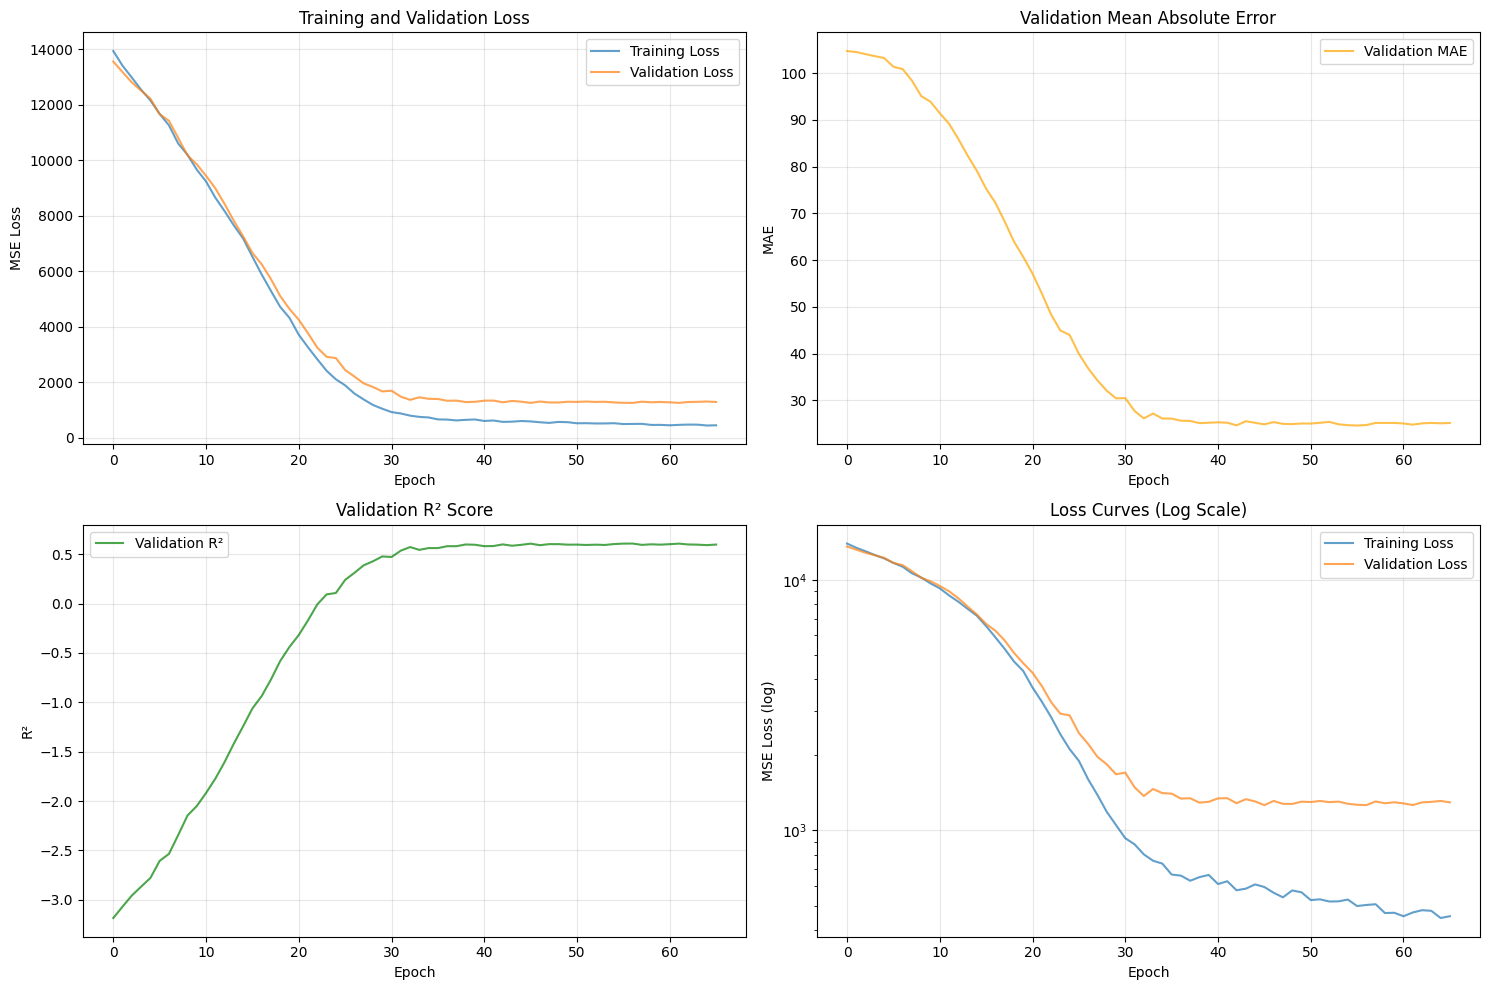


EVALUATING ON TEST SET
FINAL TEST RESULTS
Mean Absolute Error (MAE):  23.38
Mean Squared Error (MSE):   1203.07
Root Mean Squared Error:    34.69
R² Score:                   0.6268
Mean Absolute % Error:      24.44%


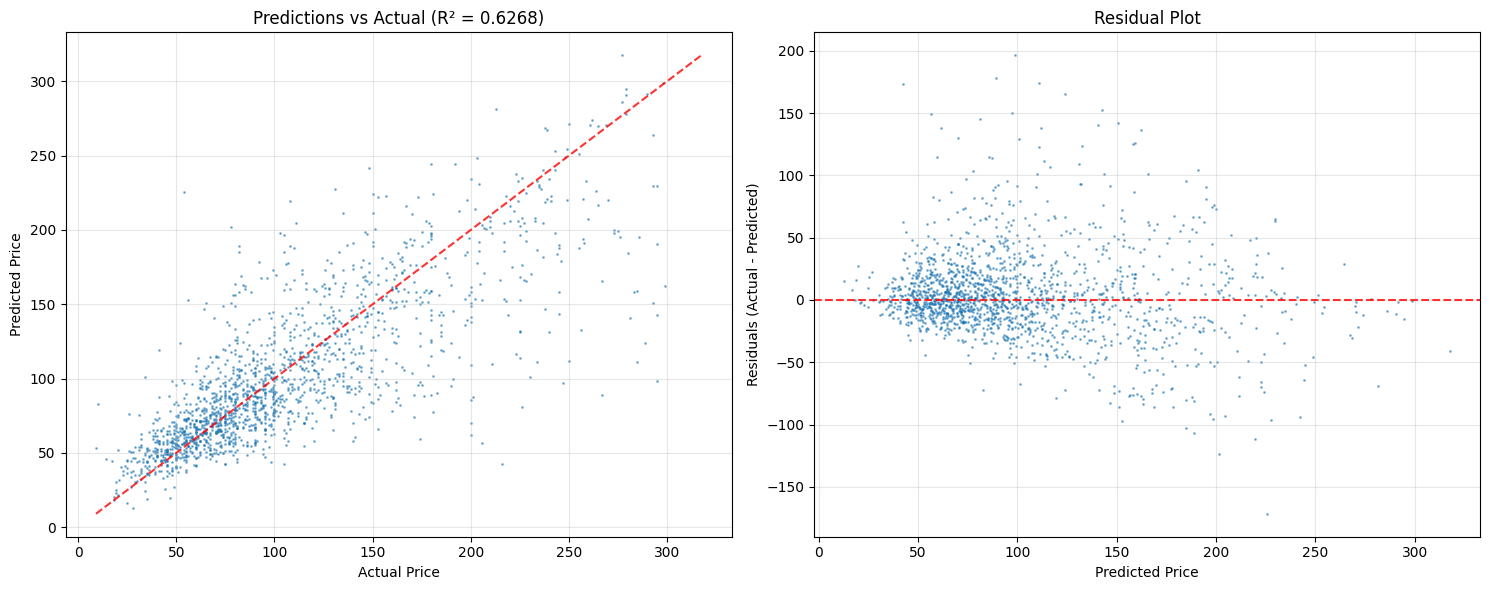

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Get input size from your data
input_size = len([col for col in listings.columns if col != 'price'])
print(f"Input features: {input_size}")

# Create model
model = MLP(input_size=input_size, hidden_sizes=[512, 256, 128], dropout_rate=0.3)
model = model.to(device)

print("\nModel Architecture:")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")

# Train the model
print("\n" + "="*60)
print("STARTING TRAINING")
print("="*60)

history = train_model(
    model=model,
    train_loader=rain_loader,
    val_loader=val_loader,
    num_epochs=100,
    learning_rate=0.001,
    device=device
)

# Plot training history
plot_training_history(history)

# Evaluate on test set
print("\n" + "="*60)
print("EVALUATING ON TEST SET")
print("="*60)

test_results = evaluate_model(model, test_loader, device)

# Plot predictions
plot_predictions(test_results)